ЧТЕНИЕ ДАННЫХ ИЗ ФАЙЛА

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
csv_path = '/content/drive/My Drive/PythonLab/train.csv'
x = pd.read_csv(csv_path)
del x['Id']
x 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

ПОЛУЧЕНИЕ ЗНАЧЕНИЙ ДЛЯ ДАЛЬНЕЙШЕГО ИХ ПРЕДСКАЗАНИЯ

УДАЛЕНИЕ НЕНУЖНЫХ СТОЛБЦОВ

In [ ]:
# выбор истинных значений
y = x.get('SalePrice')
x = x.drop('SalePrice', axis=1)

In [ ]:
# в этих столбцах одни NaN, поэтому их удаляем
x.drop(labels=["Alley","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


ЗАМЕНА NaN НА НАИБОЛЕЕ ЧАСТО ВСТРЕЧАЮЩИЕСЯ ЗНАЧЕНИЯ В КАЖДОМ СТОЛБЦЕ

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
x[x.columns] = SimpleImputer(strategy="most_frequent").fit_transform(x[x.columns])
df = pd.DataFrame(x)
x = df.apply(preprocessing.LabelEncoder().fit_transform)

x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,2,1,89,1,2,220,4,4,2,0,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,4,1,62,1,2,149,4,4,2,187,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,4,1,87,1,2,260,4,4,2,0,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,84,2,3,284,4,4,2,0,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,4,1,86,1,3,380,4,4,2,118,70,0,0,0,0,0,11,2,8,4


НОРМАЛИЗАЦИЯ ДАННЫХ

In [ ]:
def normalize_data(data):
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  data -= mean
  data /= std
  return data

  
x_norm = normalize_data(x)
x_norm.head()
# перевод данных к "нормальным" значениям

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.200281,-0.045516,-0.154108,-0.549026,0.064216,0.750473,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.075290,0.878367,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.784162,-0.777709,0.364083,0.835313,-0.324041,0.280952,0.628696,-0.429771,0.780188,0.30721,-0.305057,-1.106830,-0.617087,-0.123004,-0.884355,0.263722,0.3023,-0.944656,1.212165,-0.114562,0.621770,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,0.913976,0.25589,-0.950901,-0.429882,-0.686541,0.939768,-0.281790,0.311618,0.443729,0.215572,0.185955,0.289646,-0.748781,0.279022,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,0.138730,0.31376,0.208431
1,-1.001078,-0.045516,0.632964,0.019611,0.064216,0.750473,0.314559,-0.026171,-0.628101,-0.225639,1.953633,-1.187667,-0.031729,-0.41155,-0.543271,-0.071812,2.178881,0.139491,-0.429430,-0.491347,-0.125754,-0.508077,-0.660833,0.386914,-0.647116,0.663224,0.364083,-0.548974,-0.324041,0.280952,-1.128044,-1.518177,1.378954,0.30721,-0.305057,-0.692339,0.703255,-0.123004,-0.884355,0.263722,0.3023,0.473539,-0.700323,-0.114562,-0.534735,-0.819684,3.947457,0.789470,-0.761360,0.165354,-0.211381,0.795356,-0.318731,0.25589,0.600289,1.791811,-0.686541,-0.173215,-0.281790,0.311618,-0.166310,0.215572,0.185955,0.289646,1.845208,-0.744106,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-0.488943,-0.614228,0.31376,0.208431
2,0.200281,-0.045516,0.003306,0.697984,0.064216,-1.378460,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.005972,0.829930,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.515798,-0.777709,0.364083,0.835313,-0.324041,0.280952,-0.249674,-0.429771,0.092350,0.30721,-0.305057,-0.202887,-0.440705,-0.123004,-0.884355,0.263722,0.3023,-0.731684,1.269869,-0.114562,0.787593,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,-0.318731,0.25589,0.600289,1.791811,-0.686541,0.857324,-0.281790,0.311618,0.787413,0.215572,0.185955,0.289646,-0.748781,-0.117701,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,0.990552,0.138730,0.31376,0.208431
3,0.440553,-0.045516,-0.416465,-0.010318,0.064216,-1.378460,0.314559,-0.026171,-1.860664,-0.225639,-1.039515,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,-1.870743,-0.720051,-0.491347,-0.125754,1.055567,1.316250,0.386914,-0.647116,0.663224,0.364083,-1.933261,0.832683,-2.791627,0.628696,-1.518177,-0.679612,0.30721,-0.305057,0.096957,-0.929534,-0.123004,0.265385,0.263722,0.3023,-0.586477,0.783504,-0.114562,0.643030,1.107431,-0.240978,-1.025689,-0.761360,0.165354,-0.211381,-0.409229,0.297623,0.25589,0.600289,-0.429882,1.586361,0.733660,0.949987,1.649742,0.993623,0.215572,0.185955,0.289646,-0.748781,-0.242982,4.282540,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,-1.367186,0.31376,-3.425110
4,0.200281,-0.045516,0.842850,1.439539,0.064216,-1.378460,0.314559,-0.026171,-0.628101,-0.225639,0.457059,-0.036277,-0.031729,-0.41155,1.026338,1.374324,-0.517023,0.971313,0.733056,-0.491347,-0.125754,0.742838,0.751369,-1.241024,1.824075,-0.777709,0.364083,0.835313,-0.324041,0.280952,-2.006414,-0.429771,0.616888,0.30721,-0.305057,-0.026508,0.345452,

ДЕЛЕНИЕ ДАННЫХ НА ТРЕНИРОВОЧНЫЕ И ТЕСТОВЫЕ

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state = 2)

СОЗДАНИЕ МОДЕЛИ ВРУЧНУЮ И ЕЕ ОБУЧЕНИЕ

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model_HandMade = Sequential()
model_HandMade.add(Dense(5000, activation="relu", input_shape=(x_train.shape[1],)))
model_HandMade.add(Dropout(0.3)) #чтобы убрать возможность переобучения
model_HandMade.add(Dense(1200, activation="relu"))
model_HandMade.add(Dense(600, activation="relu"))
model_HandMade.add(Dense(158, activation="relu"))
model_HandMade.add(Dense(1))
model_HandMade.compile(optimizer="adam", loss="mse", metrics=["mae"])
model_HandMade.summary()
history = model_HandMade.fit(x_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5000)              380000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1200)              6001200   
_________________________________________________________________
dense_7 (Dense)              (None, 600)               720600    
_________________________________________________________________
dense_8 (Dense)              (None, 158)               94958     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 159       
Total params: 7,196,917
Trainable params: 7,196,917
Non-trainable params: 0
____________________________________________

СОЗДАНИЕ ГРАФИКОВ ПО РЕЗУЛЬТАТАМ ТРЕНИРОВКИ

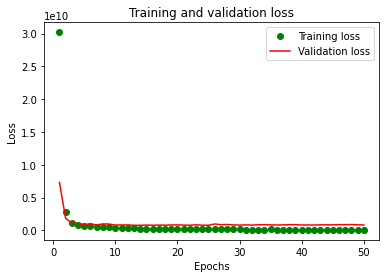

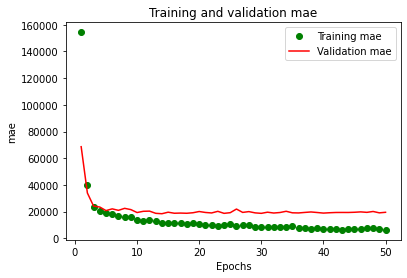

In [ ]:
import matplotlib.pyplot as plt

history = history.history
# функция рисования графиков
def draw_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, loss_values, 'og', label='Training loss')
    plt.plot(epochs, validation_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.clf()
    acc_values = history['mae']
    validation_acc_values = history['val_mae']
    plt.plot(epochs, acc_values, 'og', label='Training mae')
    plt.plot(epochs, validation_acc_values, 'r', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

draw_graph(history)

ПРЕДСКАЗАНИЕ НА МОДЕЛИ, СОЗДАННОЙ ВРУЧНУЮ

In [ ]:
predicted_y = model_HandMade.predict(x_test)

ПЕРЕВОД В ОДНОМЕРНЫЕ ВЕКТОРЫ

In [ ]:
import numpy as np
y_test = np.reshape(y_test, (y_test.shape[0]))
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0]))

ВЫВОД РЕАЛЬНЫХ И ПРЕДСКАЗАННЫХ ЗНАЧЕНИЙ

In [ ]:
y_test = y_test.astype("float64")
predicted_y = predicted_y.astype("float64")
for y1, y2 in zip(y_test, predicted_y):
  print(f"true  {y1} predicted  {y2}")

true  289000.0 predicted  283314.0625
true  178000.0 predicted  155647.109375
true  359100.0 predicted  277905.09375
true  197000.0 predicted  199240.765625
true  224000.0 predicted  207520.421875
true  221000.0 predicted  197322.546875
true  227000.0 predicted  216030.34375
true  201000.0 predicted  177144.296875
true  84500.0 predicted  128573.4765625
true  315000.0 predicted  407316.8125
true  215000.0 predicted  224109.546875
true  207000.0 predicted  190046.625
true  118000.0 predicted  124322.4453125
true  147000.0 predicted  166511.5625
true  105000.0 predicted  119363.7421875
true  225000.0 predicted  219441.4375
true  287000.0 predicted  278679.125
true  284000.0 predicted  308494.78125
true  240000.0 predicted  272179.9375
true  285000.0 predicted  301532.25
true  310000.0 predicted  370545.0625
true  172500.0 predicted  163335.421875
true  174000.0 predicted  150951.96875
true  222000.0 predicted  252362.578125
true  438780.0 predicted  491733.5625
true  260400.0 predicted  

ВЫЧИСЛЕНИЕ КОЭФФИЦИЕНТА КОРРЕЛЯЦИИ

In [ ]:
СС = np.corrcoef(predicted_y, y_test)
СС = СС[0][1]
print(f'My model Correlation Coefficient: {СС}')
# насколько схожи предсказания и реальность

My model Correlation Coefficient: 0.8628699430487967


In [ ]:
! rm -rf untitled_project/

ПОДБОР НАИЛУЧШЕЙ МОДЕЛИ С ПОМОЩЬЮ KERAS TUNER

In [ ]:
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch, Hyperband
from kerastuner.engine import hyperparameters

def create_model(hp):
  #функция создания модели с гиперпараметрами
  model = Sequential()
  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  model.add(Dense(units=hp.Int("units_input", min_value=32,max_value=1024, step=32), activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=32//(i+1), max_value=512//(i+1), step=64//(i+1)), activation=activation_choice))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  model.summary()
  return model


def search_best_model(x_train_norm, y_train):
  #поиск модели с помощью hyperband
  tuner = Hyperband(create_model, objective="loss", max_epochs=10, hyperband_iterations=3)
  tuner.search(x_train, y_train, batch_size=300, epochs=1, validation_split=0.2)
  tuner.results_summary()
  print("\n\n\nfound best model:\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model
  

best_model = search_best_model(x_train, y_train)


Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2432      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38912     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                49248     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                7760      
_________________________________________________________________
dense_3 (Dense)              (None, 73)                5913      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 74        
Total params: 101,907
Trainable params: 101,907
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 448)               34048     
_________________________________________________________________
dropout (Dropout)            (None, 448)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                14368     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                2640      
_________________________________________________________________
dense_3 (Dense)              (None, 115)               9315      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 116       
Total params: 60,487
Trainable params: 60,487
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               17024     
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_2 (Dense)              (None, 112)               25200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 92,737
Trainable params: 92,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 77ms/step - loss: 38618001408.0000 - mae: 179867.6094 - val_loss: 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                28704     
_________________________________________________________________
dense_2 (Dense)              (None, 144)               4752      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 145       
Total params: 101,697
Trainable params: 101,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 86ms/step - loss: 38618324992.0000 - mae: 179867.6094 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               12160     
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               56672     
_________________________________________________________________
dense_2 (Dense)              (None, 176)               62128     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 131,137
Trainable params: 131,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 80ms/step - loss: 38617907200.0000 - mae: 179866.4062 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               150752    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               25200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 227,137
Trainable params: 227,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 82ms/step - loss: 38617649152.0000 - mae: 179866.5312 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               17024     
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               36000     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2576      
_________________________________________________________________
dense_3 (Dense)              (None, 73)                1241      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 74        
Total params: 56,915
Trainable params: 56,915
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               349536    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                28240     
_________________________________________________________________
dense_3 (Dense)              (None, 115)               9315      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 116       
Total params: 462,599
Trainable params: 462,599
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4864      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               18720     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                23120     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                7614      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 54,413
Trainable params: 54,413
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               48640     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               184608    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                13872     
_________________________________________________________________
dense_3 (Dense)              (None, 31)                1519      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32        
Total params: 248,671
Trainable params: 248,671
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                36960     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 66,241
Trainable params: 66,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 76ms/step - loss: 38618185728.0000 - mae: 179867.1875 - val_loss: 38094958592.0000 - val_mae: 178914.3281
Epoch 2/2
3/3 [==============================] - 0s 16ms/step - loss: 38616576000.0000 - mae

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               349536    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                28240     
_________________________________________________________________
dense_3 (Dense)              (None, 115)               9315      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 116       
Total params: 462,599
Trainable params: 462,599
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               48640     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               184608    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                13872     
_________________________________________________________________
dense_3 (Dense)              (None, 31)                1519      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32        
Total params: 248,671
Trainable params: 248,671
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               150752    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               25200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 227,137
Trainable params: 227,137
Non-trainable params: 0
_________________________________________________________________
Epoch 3/4
3/3 [==============================] - 0s 83ms/step - loss: 38617788416.0000 - mae: 179866.6719 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38912     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                49248     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                7760      
_________________________________________________________________
dense_3 (Dense)              (None, 73)                5913      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 74        
Total params: 101,907
Trainable params: 101,907
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               349536    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                28240     
_________________________________________________________________
dense_3 (Dense)              (None, 115)               9315      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 116       
Total params: 462,599
Trainable params: 462,599
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               150752    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               25200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 227,137
Trainable params: 227,137
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 86ms/step - loss: 38617657344.0000 - mae: 179866.4531 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                7296      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               46560     
_________________________________________________________________
dense_2 (Dense)              (None, 208)               100048    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 154,113
Trainable params: 154,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 79ms/step - loss: 38617206784.0000 - mae: 179864.0625 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 928)               70528     
_________________________________________________________________
dropout (Dropout)            (None, 928)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               386464    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 457,409
Trainable params: 457,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 94ms/step - loss: 38616227840.0000 - mae: 179861.3281 - val_loss: 38087909376.0000 - val_mae: 178894.4219
Epoch 2/4
3/3 [==============================] - 0s 27ms/step - loss: 38606487552.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               53504     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               293280    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               73392     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 420,353
Trainable params: 420,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 97ms/step - loss: 38616240128.0000 - mae: 179865.2031 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 416)               31616     
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               120096    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 289       
Total params: 152,001
Trainable params: 152,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 81ms/step - loss: 38618071040.0000 - mae: 179867.2656 - val_loss: 38094413824.0000 - val_mae: 178913.9375
Epoch 2/4
3/3 [==============================] - 0s 19ms/step - loss: 38615756800.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               26752     
_________________________________________________________________
dropout (Dropout)            (None, 352)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               79072     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                3600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 109,441
Trainable params: 109,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 78ms/step - loss: 38617825280.0000 - mae: 179867.0000 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               36480     
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               107744    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 144,449
Trainable params: 144,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 86ms/step - loss: 38617890816.0000 - mae: 179867.5000 - val_loss: 38093901824.0000 - val_mae: 178914.5938
Epoch 2/4
3/3 [==============================] - 0s 19ms/step - loss: 38614925312.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               53504     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               293280    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               73392     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 420,353
Trainable params: 420,353
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 92ms/step - loss: 38616375296.0000 - mae: 179865.1406 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                7296      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               46560     
_________________________________________________________________
dense_2 (Dense)              (None, 208)               100048    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 154,113
Trainable params: 154,113
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 79ms/step - loss: 38617460736.0000 - mae: 179864.6875 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               373152    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 441,665
Trainable params: 441,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 96ms/step - loss: 38617694208.0000 - mae: 179867.1562 - val_loss: 38092693504.0000 - val_mae: 178912.8594
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 38612135936.0000 -

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 448)               34048     
_________________________________________________________________
dropout (Dropout)            (None, 448)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               129312    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 145       
Total params: 205,121
Trainable params: 205,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 79ms/step - loss: 38617505792.0000 - mae: 179864.8281 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4864      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               27040     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 32,321
Trainable params: 32,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 73ms/step - loss: 38618480640.0000 - mae: 179867.5312 - val_loss: 38095646720.0000 - val_mae: 178914.4844
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 38617735168.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               9728      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               37152     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 289       
Total params: 47,169
Trainable params: 47,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 78ms/step - loss: 38618279936.0000 - mae: 179866.9844 - val_loss: 38094835712.0000 - val_mae: 178912.2500
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 38616690688.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               19456     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               74016     
_________________________________________________________________
dense_2 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_3 (Dense)              (None, 73)                10585     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 74        
Total params: 145,747
Trainable params: 145,747
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12320     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 41,537
Trainable params: 41,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 77ms/step - loss: 38618079232.0000 - mae: 179866.4062 - val_loss: 38094811136.0000 - val_mae: 178912.2500
Epoch 2/2
3/3 [==============================] - 0s 16ms/step - loss: 38616678400.0000 - mae

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 416)               31616     
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                13344     
_________________________________________________________________
dense_2 (Dense)              (None, 176)               5808      
_________________________________________________________________
dense_3 (Dense)              (None, 136)               24072     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 137       
Total params: 74,977
Trainable params: 74,977
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                86112     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 154,305
Trainable params: 154,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 87ms/step - loss: 38617878528.0000 - mae: 179867.1406 - val_loss: 38093848576.0000 - val_mae: 178913.2500
Epoch 2/2
3/3 [==============================] - 0s 20ms/step - loss: 38614654976.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               86240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 115,649
Trainable params: 115,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 77ms/step - loss: 38618230784.0000 - mae: 179867.2812 - val_loss: 38094843904.0000 - val_mae: 178914.4062
Epoch 2/2
3/3 [==============================] - 0s 18ms/step - loss: 38616412160.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               48640     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               102560    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               28336     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 179,713
Trainable params: 179,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 82ms/step - loss: 38617513984.0000 - mae: 179864.8594 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               200928    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 269,249
Trainable params: 269,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 83ms/step - loss: 38617071616.0000 - mae: 179863.7344 - val_loss: 38091132928.0000 - val_mae: 178902.5781
Epoch 2/2
3/3 [==============================] - 0s 23ms/step - loss: 38611431424.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 864)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 864)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               304480    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 353       
Total params: 370,497
Trainable params: 370,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 85ms/step - loss: 38617075712.0000 - mae: 179866.4844 - val_loss: 38091554816.0000 - val_mae: 178912.1875
Epoch 2/2
3/3 [==============================] - 0s 26ms/step - loss: 38610796544.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               184800    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               53872     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 267,969
Trainable params: 267,969
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 82ms/step - loss: 38617063424.0000 - mae: 179863.5625 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               476640    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               69264     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 145       
Total params: 621,441
Trainable params: 621,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 99ms/step - loss: 38616342528.0000 - mae: 179864.8750 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                36960     
_________________________________________________________________
dense_2 (Dense)              (None, 176)               17072     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 83,393
Trainable params: 83,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 78ms/step - loss: 38617837568.0000 - mae: 179865.7969 - val_loss: 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              77824     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               360800    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 49        
Total params: 455,617
Trainable params: 455,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 99ms/step - loss: 38616678400.0000 - mae: 179862.6719 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               476640    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               69264     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 145       
Total params: 621,441
Trainable params: 621,441
Non-trainable params: 0
_________________________________________________________________
Epoch 3/4
3/3 [==============================] - 0s 101ms/step - loss: 38615945216.0000 - mae: 179863.9688 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              77824     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               360800    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 49        
Total params: 455,617
Trainable params: 455,617
Non-trainable params: 0
_________________________________________________________________
Epoch 3/4
3/3 [==============================] - 0s 94ms/step - loss: 38616633344.0000 - mae: 179862.5938 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               184800    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               53872     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 267,969
Trainable params: 267,969
Non-trainable params: 0
_________________________________________________________________
Epoch 3/4
3/3 [==============================] - 0s 84ms/step - loss: 38617509888.0000 - mae: 179864.6719 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               19456     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               74016     
_________________________________________________________________
dense_2 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_3 (Dense)              (None, 73)                10585     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 74        
Total params: 145,747
Trainable params: 145,747
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               75392     
_________________________________________________________________
dropout (Dropout)            (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               476640    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               69264     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 145       
Total params: 621,441
Trainable params: 621,441
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 101ms/step - loss: 38615932928.0000 - mae: 179863.9844 - val_lo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              77824     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               360800    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 49        
Total params: 455,617
Trainable params: 455,617
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 95ms/step - loss: 38616612864.0000 - mae: 179862.5625 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               48640     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                61536     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                7760      
_________________________________________________________________
dense_3 (Dense)              (None, 94)                7614      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 125,645
Trainable params: 125,645
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               60800     
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               179424    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                3600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 243,841
Trainable params: 243,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 83ms/step - loss: 38617395200.0000 - mae: 179864.5938 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               36480     
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               107744    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 144,449
Trainable params: 144,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 79ms/step - loss: 38617591808.0000 - mae: 179866.8438 - val_loss: 38093656064.0000 - val_mae: 178914.6875
Epoch 2/4
3/3 [==============================] - 0s 19ms/step - loss: 38614478848.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 544)               41344     
_________________________________________________________________
dropout (Dropout)            (None, 544)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               261600    
_________________________________________________________________
dense_2 (Dense)              (None, 208)               100048    
_________________________________________________________________
dense_3 (Dense)              (None, 52)                10868     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 53        
Total params: 413,913
Trainable params: 413,913
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               21888     
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               101728    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               39536     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 163,265
Trainable params: 163,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 85ms/step - loss: 38617681920.0000 - mae: 179865.2188 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4864      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               31200     
_________________________________________________________________
dense_2 (Dense)              (None, 208)               100048    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 78ms/step - loss: 38618058752.0000 - mae: 179867.5469 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 544)               41344     
_________________________________________________________________
dropout (Dropout)            (None, 544)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               261600    
_________________________________________________________________
dense_2 (Dense)              (None, 208)               100048    
_________________________________________________________________
dense_3 (Dense)              (None, 52)                10868     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 53        
Total params: 413,913
Trainable params: 413,913
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               21888     
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               101728    
_________________________________________________________________
dense_2 (Dense)              (None, 112)               39536     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 113       
Total params: 163,265
Trainable params: 163,265
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 79ms/step - loss: 38617677824.0000 - mae: 179865.2031 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               279968    
_________________________________________________________________
dense_2 (Dense)              (None, 208)               86736     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 417,985
Trainable params: 417,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 87ms/step - loss: 38617296896.0000 - mae: 179865.9844 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 928)               70528     
_________________________________________________________________
dropout (Dropout)            (None, 928)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               267552    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                13872     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                490       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 352,453
Trainable params: 352,453
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               135520    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                4606      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 186,349
Trainable params: 186,349
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                7296      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dense_2 (Dense)              (None, 176)               17072     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 74ms/step - loss: 38618214400.0000 - mae: 179866.7500 - val_loss:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               19456     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               106912    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 126,785
Trainable params: 126,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 76ms/step - loss: 38617931776.0000 - mae: 179865.9219 - val_loss: 38093545472.0000 - val_mae: 178908.6094
Epoch 2/2
3/3 [==============================] - 0s 17ms/step - loss: 38614896640.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              77824     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               164000    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               28336     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 270,337
Trainable params: 270,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 84ms/step - loss: 38617841664.0000 - mae: 179866.9844 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 960)               72960     
_________________________________________________________________
dropout (Dropout)            (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               276768    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 289       
Total params: 350,017
Trainable params: 350,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 83ms/step - loss: 38616727552.0000 - mae: 179865.4219 - val_loss: 38090997760.0000 - val_mae: 178911.3594
Epoch 2/2
3/3 [==============================] - 0s 25ms/step - loss: 38610087936.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               63232     
_________________________________________________________________
dropout (Dropout)            (None, 832)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               293216    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               50832     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                13630     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 421,005
Trainable params: 421,005
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               53504     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                67680     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 121,281
Trainable params: 121,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 80ms/step - loss: 38618046464.0000 - mae: 179867.4219 - val_loss: 38094430208.0000 - val_mae: 178914.1406
Epoch 2/2
3/3 [==============================] - 0s 18ms/step - loss: 38615629824.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                64608     
_________________________________________________________________
dense_2 (Dense)              (None, 144)               13968     
_________________________________________________________________
dense_3 (Dense)              (None, 115)               16675     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 116       
Total params: 146,439
Trainable params: 146,439
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               63232     
_________________________________________________________________
dropout (Dropout)            (None, 832)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                79968     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 143,297
Trainable params: 143,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 77ms/step - loss: 38617944064.0000 - mae: 179866.0312 - val_loss: 38093496320.0000 - val_mae: 178908.9219
Epoch 2/2
3/3 [==============================] - 0s 19ms/step - loss: 38614790144.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 416)               31616     
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               66720     
_________________________________________________________________
dense_2 (Dense)              (None, 208)               33488     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 132,033
Trainable params: 132,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 82ms/step - loss: 38617714688.0000 - mae: 179867.0000 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 576)               43776     
_________________________________________________________________
dropout (Dropout)            (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               203104    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 52)                2548      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 53        
Total params: 266,425
Trainable params: 266,425
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4864      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               18720     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               69360     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 241       
Total params: 93,185
Trainable params: 93,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 81ms/step - loss: 38617866240.0000 - mae: 179866.2031 - val_loss: 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                86112     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                7760      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 162,049
Trainable params: 162,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 0s 87ms/step - loss: 38617935872.0000 - mae: 179866.7500 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 608)               46208     
_________________________________________________________________
dropout (Dropout)            (None, 608)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               292320    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                38480     
_________________________________________________________________
dense_3 (Dense)              (None, 136)               11016     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 137       
Total params: 388,161
Trainable params: 388,161
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               63232     
_________________________________________________________________
dropout (Dropout)            (None, 832)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               293216    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               50832     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                13630     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 421,005
Trainable params: 421,005
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 608)               46208     
_________________________________________________________________
dropout (Dropout)            (None, 608)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               292320    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                38480     
_________________________________________________________________
dense_3 (Dense)              (None, 136)               11016     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 137       
Total params: 388,161
Trainable params: 388,161
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 576)               43776     
_________________________________________________________________
dropout (Dropout)            (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               203104    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                16944     
_________________________________________________________________
dense_3 (Dense)              (None, 52)                2548      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 53        
Total params: 266,425
Trainable params: 266,425
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 960)               72960     
_________________________________________________________________
dropout (Dropout)            (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               276768    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 289       
Total params: 350,017
Trainable params: 350,017
Non-trainable params: 0
_________________________________________________________________
Epoch 3/4
3/3 [==============================] - 0s 96ms/step - loss: 38616842240.0000 - mae: 179865.7344 - val_loss: 38091321344.0000 - val_mae: 178911.6562
Epoch 4/4
3/3 [==============================] - 0s 28ms/step - loss: 38610436096.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               63232     
_________________________________________________________________
dropout (Dropout)            (None, 832)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               293216    
_________________________________________________________________
dense_2 (Dense)              (None, 144)               50832     
_________________________________________________________________
dense_3 (Dense)              (None, 94)                13630     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 95        
Total params: 421,005
Trainable params: 421,005
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 608)               46208     
_________________________________________________________________
dropout (Dropout)            (None, 608)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               292320    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                38480     
_________________________________________________________________
dense_3 (Dense)              (None, 136)               11016     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 137       
Total params: 388,161
Trainable params: 388,161
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               315744    
_________________________________________________________________
dense_2 (Dense)              (None, 240)               84720     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 241       
Total params: 468,801
Trainable params: 468,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 94ms/step - loss: 38615707648.0000 - mae: 179860.2344 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                7296      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               15520     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_3 (Dense)              (None, 157)               12717     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 48,571
Trainable params: 48,571
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               236896    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 353       
Total params: 288,321
Trainable params: 288,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 83ms/step - loss: 38617477120.0000 - mae: 179867.2344 - val_loss: 38092357632.0000 - val_mae: 178913.4062
Epoch 2/4
3/3 [==============================] - 0s 23ms/step - loss: 38611972096.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 448)               34048     
_________________________________________________________________
dropout (Dropout)            (None, 448)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               71840     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 106,049
Trainable params: 106,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 77ms/step - loss: 38617952256.0000 - mae: 179867.2344 - val_loss: 38094426112.0000 - val_mae: 178915.1406
Epoch 2/4
3/3 [==============================] - 0s 20ms/step - loss: 38615744512.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               12160     
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 288)               46368     
_________________________________________________________________
dense_2 (Dense)              (None, 176)               50864     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 177       
Total params: 109,569
Trainable params: 109,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 80ms/step - loss: 38617866240.0000 - mae: 179866.2969 - val_loss

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               36480     
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 480)               230880    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 481       
Total params: 267,841
Trainable params: 267,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
3/3 [==============================] - 0s 82ms/step - loss: 38617739264.0000 - mae: 179867.5469 - val_loss: 38093004800.0000 - val_mae: 178913.9531
Epoch 2/4
3/3 [==============================] - 0s 22ms/step - loss: 38613102592.0000 - m

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               315744    
_________________________________________________________________
dense_2 (Dense)              (None, 240)               84720     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 241       
Total params: 468,801
Trainable params: 468,801
Non-trainable params: 0
_________________________________________________________________
Epoch 5/10
3/3 [==============================] - 0s 93ms/step - loss: 38616477696.0000 - mae: 179862.1094 - val_los

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                7296      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               15520     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_3 (Dense)              (None, 157)               12717     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 48,571
Trainable params: 48,571
Non-trainable params: 0
____________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               14592     
_________________________________________________________________
dropout (Dropout)            (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               43232     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                18000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 75,905
Trainable params: 75,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 78ms/step - loss: 38618185728.0000 - mae: 179867.0312 - val_loss:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               29184     
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               135520    
_________________________________________________________________
dense_2 (Dense)              (None, 176)               62128     
_________________________________________________________________
dense_3 (Dense)              (None, 31)                5487      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 32        
Total params: 232,351
Trainable params: 232,351
Non-trainable params: 0
__________________________________________________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 448)               34048     
_________________________________________________________________
dropout (Dropout)            (None, 448)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               186784    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 221,249
Trainable params: 221,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 81ms/step - loss: 38617747456.0000 - mae: 179867.7344 - val_loss: 38093361152.0000 - val_mae: 178914.6562
Epoch 2/10
3/3 [==============================] - 0s 21ms/step - loss: 38613921792.0000 -

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 736)               55936     
_________________________________________________________________
dropout (Dropout)            (None, 736)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               306592    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 362,945
Trainable params: 362,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 0s 91ms/step - loss: 38617673728.0000 - mae: 179866.8281 - val_loss: 38092931072.0000 - val_mae: 178913.0000
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 38612553728.0000 -

INFO:tensorflow:Oracle triggered exit





found best model:



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 672)               51072     
_________________________________________________________________
dropout (Dropout)            (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               279968    
_________________________________________________________________
dense_2 (Dense)              (None, 208)               86736     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 209       
Total params: 417,985
Trainable params: 417,985
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer 

ТРЕНИРОВКА ЛУЧШЕЙ МОДЕЛИ

In [ ]:
history = best_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2)
best_history = history.history

Epoch 1/200
52/52 [==============================] - 1s 10ms/step - loss: 2322296064.0000 - mae: 28952.3613 - val_loss: 2932869888.0000 - val_mae: 33696.9141
Epoch 2/200
52/52 [==============================] - 0s 8ms/step - loss: 2292913664.0000 - mae: 28271.9102 - val_loss: 2750338816.0000 - val_mae: 31989.7246
Epoch 3/200
52/52 [==============================] - 0s 8ms/step - loss: 2273814016.0000 - mae: 28848.2598 - val_loss: 2683879424.0000 - val_mae: 30860.7832
Epoch 4/200
52/52 [==============================] - 0s 8ms/step - loss: 2245319168.0000 - mae: 28452.6406 - val_loss: 2671583488.0000 - val_mae: 31001.9082
Epoch 5/200
52/52 [==============================] - 0s 8ms/step - loss: 2277726464.0000 - mae: 28434.8691 - val_loss: 2623628032.0000 - val_mae: 30091.8203
Epoch 6/200
52/52 [==============================] - 0s 8ms/step - loss: 2297516288.0000 - mae: 28981.7500 - val_loss: 2691847168.0000 - val_mae: 31071.1641
Epoch 7/200
52/52 [==============================] - 0s 8

СОЗДАНИЕ ГРАФИКОВ ПО РЕЗУЛЬТАТАМ ТРЕНИРОВКИ ЛУЧШЕЙ МОДЕЛИ

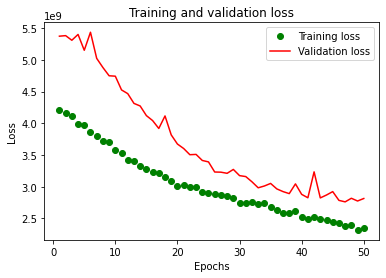

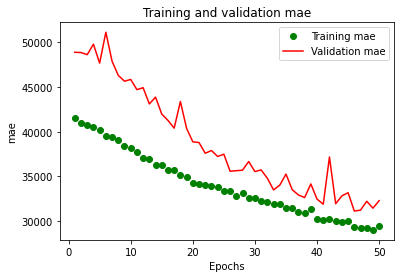

In [ ]:
draw_graph(best_history)

ПРЕДСКАЗАНИЕ НА МОДЕЛИ ТЮНЕРА

In [ ]:
predicted_y_tuner = best_model.predict(x_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

In [ ]:
predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

In [ ]:
СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Tuner model Correlation Coefficient: {СС_tuner}')

Tuner model Correlation Coefficient: 0.7618668472079371
